In [1]:
import os, sys, time, json, random, math
import pandas as pd
import subprocess
import matplotlib.pyplot as plt

In [2]:
# Make a dummy dataframe
f = lambda x: 2*x + 3
dataset = pd.DataFrame([(x, f(x)) for x in range(-100,100+1)], columns=["X", "Y"])
dataset.to_csv("dataset.csv", index=False)

In [3]:
# Run R Script
subprocess.run(["Rscript", "regression.R", "dataset.csv", 'coefficients.csv'])

Installing package into ‘/home/wil/R/x86_64-pc-linux-gnu-library/4.4’
(as ‘lib’ is unspecified)
trying URL 'http://cran.us.r-project.org/src/contrib/data.table_1.15.4.tar.gz'
Content type 'application/x-gzip' length 5387593 bytes (5.1 MB)
downloaded 5.1 MB

* installing *source* package ‘data.table’ ...
** package ‘data.table’ successfully unpacked and MD5 sums checked
** using staged installation


gcc 14.1.1
zlib 1.3.1 is available ok
R CMD SHLIB supports OpenMP without any extra hint
gcc -I"/usr/include/R/" -DNDEBUG   -I/usr/local/include   -fopenmp  -fpic  -march=x86-64 -mtune=generic -O2 -pipe -fno-plt -fexceptions         -Wp,-D_FORTIFY_SOURCE=3 -Wformat -Werror=format-security         -fstack-clash-protection -fcf-protection         -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -g -ffile-prefix-map=/build/r/src=/usr/src/debug/r -flto=auto -ffat-lto-objects  -c assign.c -o assign.o


** libs
using C compiler: ‘gcc (GCC) 14.1.1 20240507’


gcc -I"/usr/include/R/" -DNDEBUG   -I/usr/local/include   -fopenmp  -fpic  -march=x86-64 -mtune=generic -O2 -pipe -fno-plt -fexceptions         -Wp,-D_FORTIFY_SOURCE=3 -Wformat -Werror=format-security         -fstack-clash-protection -fcf-protection         -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -g -ffile-prefix-map=/build/r/src=/usr/src/debug/r -flto=auto -ffat-lto-objects  -c between.c -o between.o
gcc -I"/usr/include/R/" -DNDEBUG   -I/usr/local/include   -fopenmp  -fpic  -march=x86-64 -mtune=generic -O2 -pipe -fno-plt -fexceptions         -Wp,-D_FORTIFY_SOURCE=3 -Wformat -Werror=format-security         -fstack-clash-protection -fcf-protection         -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer -g -ffile-prefix-map=/build/r/src=/usr/src/debug/r -flto=auto -ffat-lto-objects  -c bmerge.c -o bmerge.o
gcc -I"/usr/include/R/" -DNDEBUG   -I/usr/local/include   -fopenmp  -fpic  -march=x86-64 -mtune=generic -O2 -pipe -fno-plt -fexceptions         -Wp,-D_FORTIFY_SOURCE=

installing to /home/wil/R/x86_64-pc-linux-gnu-library/4.4/00LOCK-data.table/00new/data.table/libs
** R
** inst
** byte-compile and prepare package for lazy loading
** help
*** installing help indices
** building package indices
** installing vignettes
** testing if installed package can be loaded from temporary location
** checking absolute paths in shared objects and dynamic libraries
** testing if installed package can be loaded from final location
** testing if installed package keeps a record of temporary installation path
* DONE (data.table)

The downloaded source packages are in
	‘/tmp/RtmpDutQlA/downloaded_packages’


CompletedProcess(args=['Rscript', 'regression.R', 'dataset.csv', 'coefficients.csv'], returncode=0)

In [4]:
# Load Intercept data from csv
coefficients = pd.read_csv("coefficients.csv")
slope, intercept = coefficients.iloc[0]


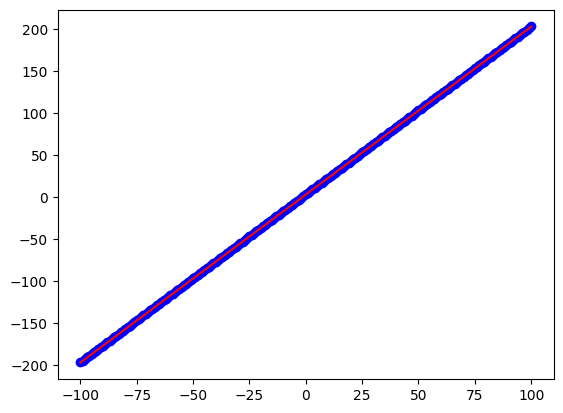

In [5]:
# Plot a line using slope and intercept and scatter plot the original dataset
plt.scatter(dataset["X"], dataset["Y"], color='blue')
plt.plot(dataset["X"], slope*dataset["X"] + intercept, color='red')
plt.show()